# Chapter 4: Essential Math

---


**Prerequisites:**
- See `Chapter02_QuantumSoftware.ipynb` for installation instructions


In [1]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt


##  Creating complex numbers

In [27]:


j = np.emath.sqrt(-1) # define j as sqrt(-1) for complex numbers
#%% Complex variables
x = 1 + 3j # note the 3j
print("The real part is: ", x.real)
print("The imaginary part is: ", x.imag)
print("The absolute value is: ", abs(x))

The real part is:  1.0
The imaginary part is:  3.0
The absolute value is:  3.1622776601683795


## Inner Product

In [28]:
v0 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
v1 = np.array([1/np.sqrt(2), -1/np.sqrt(2)])

# Inner product using np.vdot (handles conjugation)
print("Inner product <v0,v0>:", np.vdot(v0, v0))
print("Inner product <v0,v1>:", np.vdot(v0, v1))

Inner product <v0,v0>: 0.9999999999999998
Inner product <v0,v1>: -2.2371143170757382e-17


## Conjugate transpose of a matrix

In [29]:
A = np.array([[1+1j, 2], [0, 3]])
print("A = \n", A)

# Transpose
A_T = A.T
print("A^T = \n", A_T)

A_dag = np.conjugate(A).T  
print("A^dag = \n", A_dag)

A = 
 [[1.+1.j 2.+0.j]
 [0.+0.j 3.+0.j]]
A^T = 
 [[1.+1.j 0.+0.j]
 [2.+0.j 3.+0.j]]
A^dag = 
 [[1.-1.j 0.-0.j]
 [2.-0.j 3.-0.j]]


## Tensor product

In [3]:
v1 = np.array([1, 0])
v2 = np.array([0, 1])
v3 = np.kron(v1, v2)
print("v3 = \n", v3)

v3 = 
 [0 1 0 0]


## Determinant and inverse

In [30]:

# Define matrix A
A = np.array([[1+1j, 2], [0, 3]])

# Check determinant (non-zero for invertible matrix)
det_A = np.linalg.det(A)
print("det(A) = ", det_A)

# Compute inverse
A_inv = np.linalg.inv(A)
print("A^{-1} = \n", A_inv)

# Verify A * A^{-1} = I
I_check = A @ A_inv
print("A * A^{-1} = \n", I_check)



det(A) =  (3+3j)
A^{-1} = 
 [[ 0.5       -0.5j        -0.33333333+0.33333333j]
 [ 0.        +0.j          0.33333333+0.j        ]]
A * A^{-1} = 
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


## Eigen decompositon

In [31]:
A = np.array([[1.5, 0.5],
              [0.5, 1.5]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors (as columns):")
print(eigenvectors)


Eigenvalues:
[2. 1.]

Eigenvectors (as columns):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Eigen value decomposition may not exist

In [ ]:
A = np.array([[2, 1], [0, 2]])
D, V = np.linalg.eig(A)
print("Eigenvalues of A:", D)
print("Eigenvectors of A (columns of V):\n", V)

print("A = \n", V @ np.diag(D) @ np.linalg.inv(V), "?")  

Eigenvalues of A: [2. 2.]
Eigenvectors of A (columns of V):
 [[ 1.0000000e+00 -1.0000000e+00]
 [ 0.0000000e+00  4.4408921e-16]]
A = 
 [[2. 0.]
 [0. 2.]] ?


## Gershgorin Theorem

Matrix A:
[[4. +2.j  1. +0.j  0. +0.5j]
 [0.5+0.j  3. +0.j  1. -1.j ]
 [0.2+0.3j 0. +0.5j 1. +1.j ]]

Eigenvalues:
λ_1 = 4.1232+1.7635j
λ_2 = 2.9536+0.5847j
λ_3 = 0.9232+0.6518j

Gershgorin Discs:
Disc 1: Center = 4.0000+2.0000j, Radius = 1.5000
Disc 2: Center = 3.0000+0.0000j, Radius = 1.9142
Disc 3: Center = 1.0000+1.0000j, Radius = 0.8606

Verification:
λ_1 is in disc(s): [1]
λ_2 is in disc(s): [2]
λ_3 is in disc(s): [3]


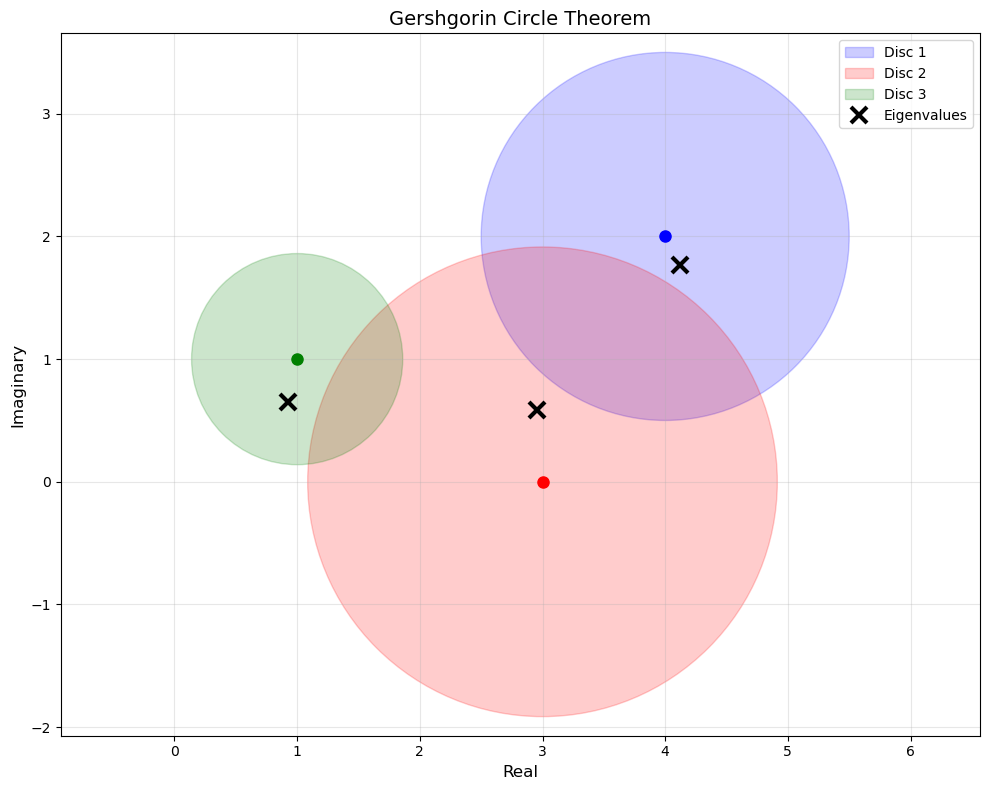

In [33]:

# Define the matrix
A = np.array([[4+2j, 1, 0.5j],
              [0.5, 3, 1-1j],
              [0.2+0.3j, 0.5j, 1+1j]])

# Compute eigenvalues
eigenvalues = np.linalg.eigvals(A)

# Calculate Gershgorin discs
centers = np.diag(A)
radii = np.array([
    np.sum(np.abs(A[0, :])) - np.abs(A[0, 0]),
    np.sum(np.abs(A[1, :])) - np.abs(A[1, 1]),
    np.sum(np.abs(A[2, :])) - np.abs(A[2, 2])
])

print("Matrix A:")
print(A)
print("\nEigenvalues:")
for i, eig in enumerate(eigenvalues):
    print(f"λ_{i+1} = {eig:.4f}")

print("\nGershgorin Discs:")
for i in range(3):
    print(f"Disc {i+1}: Center = {centers[i]:.4f}, Radius = {radii[i]:.4f}")

# Verify eigenvalues are in discs
print("\nVerification:")
for i, eig in enumerate(eigenvalues):
    in_disc = []
    for j in range(3):
        dist = np.abs(eig - centers[j])
        if dist <= radii[j]:
            in_disc.append(j+1)
    print(f"λ_{i+1} is in disc(s): {in_disc}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Plot Gershgorin discs
colors = ['blue', 'red', 'green']
for i in range(3):
    circle = plt.Circle((centers[i].real, centers[i].imag), 
                        radii[i], color=colors[i], 
                        alpha=0.2, label=f'Disc {i+1}')
    ax.add_patch(circle)
    ax.plot(centers[i].real, centers[i].imag, 'o', 
            color=colors[i], markersize=8)

# Plot eigenvalues
ax.plot(eigenvalues.real, eigenvalues.imag, 'kx', 
        markersize=12, markeredgewidth=3, label='Eigenvalues')

# Formatting
ax.set_xlabel('Real', fontsize=12)
ax.set_ylabel('Imaginary', fontsize=12)
ax.set_title('Gershgorin Circle Theorem', fontsize=14)
ax.grid(True, alpha=0.3)
ax.axis('equal')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()
